In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('fct_invoice.csv')
df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [25]:
json_df = pd.read_json('dim_customer.json')
json_df.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [10]:
#Easy
#1. How many unique customers are in the dataset?

len(df['customer_id'].unique())

5191

In [13]:
#2. What are the different categories of products available? How many unique categories are there?

df['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

In [14]:
len(df['category'].unique())

8

In [19]:
#3. Which payment method is the most popular? How many times was it used?

answer=df['payment_method'].value_counts()
answer[0:1]

Cash    44447
Name: payment_method, dtype: int64

In [10]:
#Medium
#1. What are the three most popular categories, by total sales?

df["total_sales"] = df["price"] * df["quantity"]
answer = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
answer[0:3]

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [11]:
# 2. What are the total sales attributed to customers over the age of 45?

join_df = pd.merge(left = df, right = json_df, left_on = "customer_id", right_on = "id")

join_df[join_df['age'] > 45].sum()['total_sales']

82039768.15

In [27]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

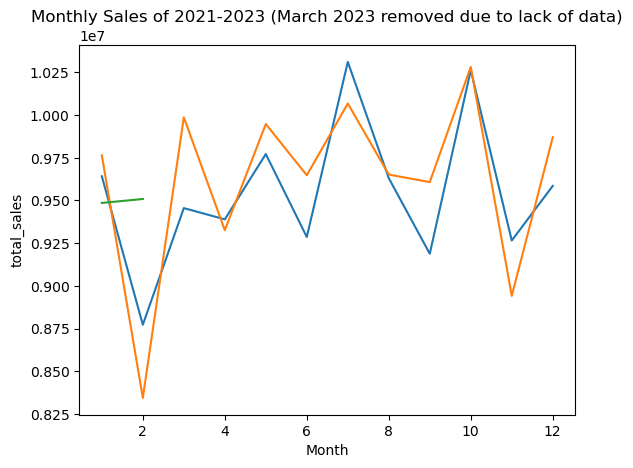

In [15]:
for year in [2021, 2022, 2023]:
    dummy_df = df[df['year'] == year].copy()
    y = dummy_df.groupby('month')['total_sales'].sum()
    x = [i for i in range(1,13)]
    
    if year == 2023:
        y = y[0:2]
        x = x[0:2]
    
    plt.plot(x,y)
    plt.title("Monthly Sales of 2021-2023 (March 2023 removed due to lack of data)")
    plt.xlabel("Month")
    plt.ylabel("total_sales")
    
plt.show()

In [16]:
#Hard
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

new_df = join_df[['total_sales','category','age']].copy()

new_df = new_df.dropna()

new_df['decade_range'] = new_df['age'].apply(lambda x: str(int(x//10*10))+"-"+str(int(x//10*10+9)) if x != None else x)

table = pd.pivot_table(new_df, values='total_sales', index=['category'],
                       columns=['decade_range'], aggfunc=np.sum)


table.transpose()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
decade_range,,,,,,,,
10-19,12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
20-29,79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
30-39,84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
40-49,87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
50-59,74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
60-69,80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
70-79,54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
80-89,26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80


In [17]:
new_df = join_df[['total_sales','category','age']].copy()

new_df = new_df.dropna()

new_df['decade_range'] = new_df['age'].apply(lambda x: str(int(x//10*10))+"-"+str(int(x//10*10+9)) if x != None else x)

table = pd.pivot_table(new_df, values='total_sales', index=['category'],
                       columns=['decade_range'], aggfunc=len)


table

decade_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,75,475,507,510,462,466,351,174
Clothing,563,3168,3389,3407,3085,3250,2349,1361
Cosmetics,235,1355,1636,1487,1329,1441,942,596
Food & Beverage,225,1342,1506,1567,1301,1430,951,555
Shoes,153,902,1022,1033,875,884,676,380
Souvenir,90,453,498,495,426,445,304,188
Technology,85,458,528,524,388,501,309,178
Toys,166,924,1076,1000,870,942,677,412
